In [1]:
import pandas as pd
import numpy as np
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import warnings
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
sns.set_theme(style="whitegrid")
import zipfile
from matplotlib.colors import ListedColormap
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("ad_viz_plotval_data.csv")

In [3]:
data.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2020,AQS,60010007,3,8.6,ug/m3 LC,48,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2020,AQS,60010007,3,4.5,ug/m3 LC,25,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2020,AQS,60010007,3,14.2,ug/m3 LC,61,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2020,AQS,60010007,3,10.9,ug/m3 LC,54,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2020,AQS,60010007,3,7.8,ug/m3 LC,43,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [4]:
data.shape

(57510, 22)

In [5]:
data.isna().sum() / len(data) * 100

Date                              0.000000
Source                            0.000000
Site ID                           0.000000
POC                               0.000000
Daily Mean PM2.5 Concentration    0.000000
Units                             0.000000
Daily AQI Value                   0.000000
Local Site Name                   0.000000
Daily Obs Count                   0.000000
Percent Complete                  0.000000
AQS Parameter Code                0.000000
AQS Parameter Description         0.000000
Method Code                       0.000000
Method Description                0.000000
CBSA Code                         9.048861
CBSA Name                         9.048861
State FIPS Code                   0.000000
State                             0.000000
County FIPS Code                  0.000000
County                            0.000000
Site Latitude                     0.000000
Site Longitude                    0.000000
dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57510 entries, 0 to 57509
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            57510 non-null  object 
 1   Source                          57510 non-null  object 
 2   Site ID                         57510 non-null  int64  
 3   POC                             57510 non-null  int64  
 4   Daily Mean PM2.5 Concentration  57510 non-null  float64
 5   Units                           57510 non-null  object 
 6   Daily AQI Value                 57510 non-null  int64  
 7   Local Site Name                 57510 non-null  object 
 8   Daily Obs Count                 57510 non-null  int64  
 9   Percent Complete                57510 non-null  float64
 10  AQS Parameter Code              57510 non-null  int64  
 11  AQS Parameter Description       57510 non-null  object 
 12  Method Code                     

In [7]:
data.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude'],
      dtype='object')

In [8]:
data1 = data[['Date','Daily AQI Value','Daily Mean PM2.5 Concentration','State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude']]

In [9]:
data1.head()

,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2020,48,8.6,6,California,1,Alameda,37.687526,-121.784217
1,01/02/2020,25,4.5,6,California,1,Alameda,37.687526,-121.784217
2,01/03/2020,61,14.2,6,California,1,Alameda,37.687526,-121.784217
3,01/04/2020,54,10.9,6,California,1,Alameda,37.687526,-121.784217
4,01/05/2020,43,7.8,6,California,1,Alameda,37.687526,-121.784217


In [10]:
data1.isna().sum()

Date                              0
Daily AQI Value                   0
Daily Mean PM2.5 Concentration    0
State FIPS Code                   0
State                             0
County FIPS Code                  0
County                            0
Site Latitude                     0
Site Longitude                    0
dtype: int64

In [11]:
data1['Date'] = pd.to_datetime(data1['Date'])

data1['Hour'] = data1['Date'].dt.hour

In [12]:
data1.head()

,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Hour
0,2020-01-01,48,8.6,6,California,1,Alameda,37.687526,-121.784217,0
1,2020-01-02,25,4.5,6,California,1,Alameda,37.687526,-121.784217,0
2,2020-01-03,61,14.2,6,California,1,Alameda,37.687526,-121.784217,0
3,2020-01-04,54,10.9,6,California,1,Alameda,37.687526,-121.784217,0
4,2020-01-05,43,7.8,6,California,1,Alameda,37.687526,-121.784217,0


In [13]:
data1['County'].value_counts().nlargest()

Los Angeles       5366
Riverside         5117
Fresno            3177
San Diego         2930
San Bernardino    2647
Name: County, dtype: int64

In [14]:
data1.nunique()

Date                               366
Daily AQI Value                    356
Daily Mean PM2.5 Concentration    1366
State FIPS Code                      1
State                                1
County FIPS Code                    51
County                              51
Site Latitude                      166
Site Longitude                     166
Hour                                 1
dtype: int64

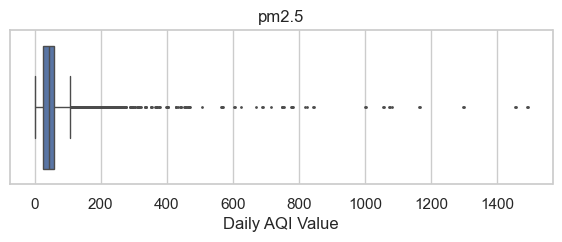

In [15]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('pm2.5')
sns.boxplot(data=None, x=data1['Daily AQI Value'], fliersize=1);

In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [17]:
filtered = remove_outliers_iqr(data1, 'Daily AQI Value')

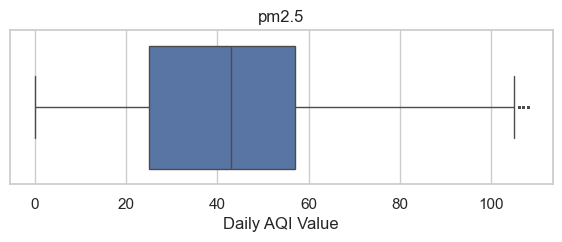

In [18]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('pm2.5')
sns.boxplot(data=None, x=filtered['Daily AQI Value'], fliersize=1);

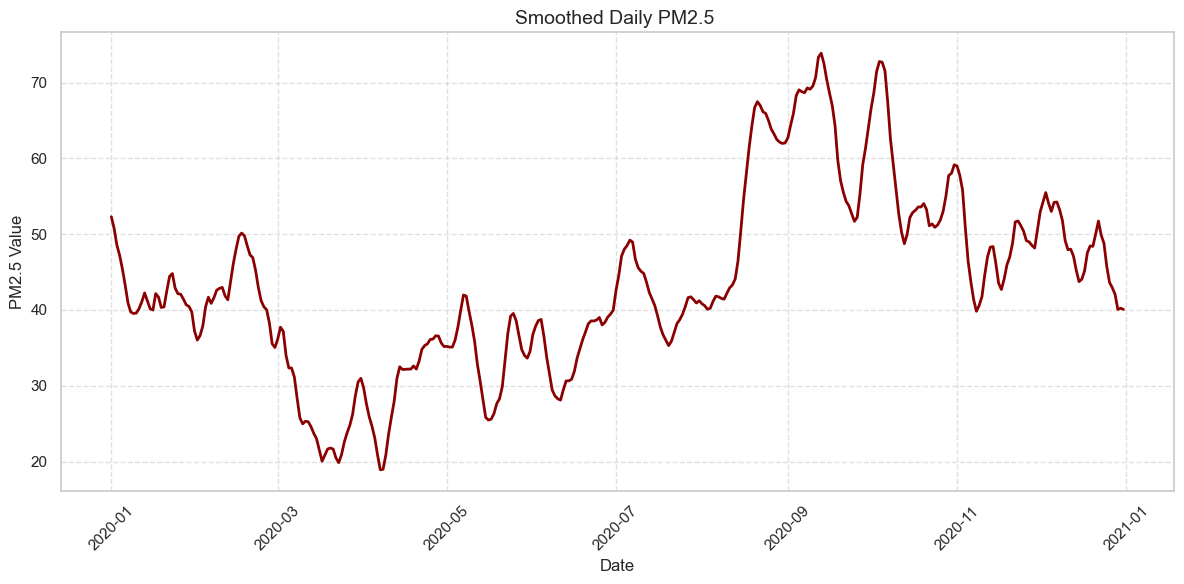

In [19]:
# Group by date to get median AOD across all locations
daily_pm = filtered.groupby('Date')['Daily AQI Value'].mean().reset_index()

# Apply rolling average smoothing (7-day window)
daily_pm['smoothed'] = daily_pm['Daily AQI Value'].rolling(window=7, center=True, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_pm['Date'], daily_pm['smoothed'], color='darkred', linewidth=2)
plt.title('Smoothed Daily PM2.5 ', fontsize=14)
plt.xlabel('Date')
plt.ylabel('PM2.5 Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
filtered['Daily AQI Value'].max()

108

In [21]:
filtered['Daily AQI Value'].min()

0

In [22]:
filtered['Daily AQI Value'].mean()

42.64758318324874

In [23]:
df_pm = filtered[filtered['Daily AQI Value'] >= 5]

In [24]:
df_pm['Daily AQI Value'].min()

5

In [25]:
df_pm.shape

(53875, 10)

In [26]:
df_pm.head()

,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Hour
0,2020-01-01,48,8.6,6,California,1,Alameda,37.687526,-121.784217,0
1,2020-01-02,25,4.5,6,California,1,Alameda,37.687526,-121.784217,0
2,2020-01-03,61,14.2,6,California,1,Alameda,37.687526,-121.784217,0
3,2020-01-04,54,10.9,6,California,1,Alameda,37.687526,-121.784217,0
4,2020-01-05,43,7.8,6,California,1,Alameda,37.687526,-121.784217,0


In [27]:
# Group by date to get median AOD across all locations
group_pm = df_pm.groupby('County')['Daily AQI Value'].mean().reset_index()

In [28]:
group_pm.head()

,County,Daily AQI Value
0,Alameda,41.606352
1,Butte,39.263267
2,Calaveras,42.039877
3,Colusa,40.995360
4,Contra Costa,42.528351


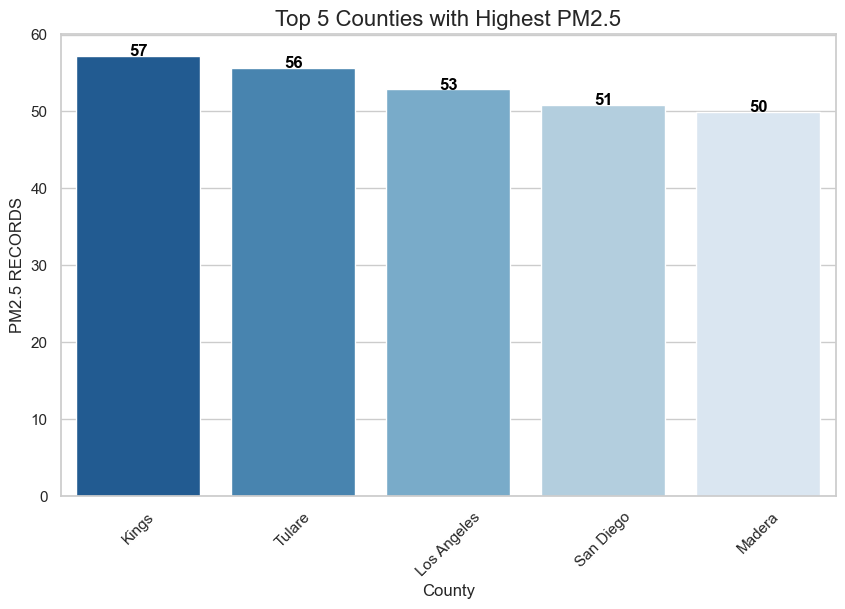

In [29]:
# Sort the DataFrame by 'Value' in descending order
cal5_sorted = group_pm.sort_values(by='Daily AQI Value', ascending=False)

# Select the top 5 counties with the highest PM2.5 values
top5_cal5 = cal5_sorted.head(5)

# Plot the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top5_cal5, x="County", y="Daily AQI Value", palette="Blues_r", ci=None)

# Add the numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Display the height as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()),  # X and Y position
                ha='center', va='baseline', fontsize=12, color='black', weight='bold')

# Set labels and title
plt.xticks(rotation=45)  
plt.title("Top 5 Counties with Highest PM2.5", fontsize=16)
plt.xlabel("County", fontsize=12)
plt.ylabel("PM2.5 RECORDS", fontsize=12)

# Show the plot
plt.show()

In [30]:
df_pm["geometry"] = gpd.points_from_xy(df_pm["Site Longitude"], df_pm["Site Latitude"])

geo_final= gpd.GeoDataFrame(df_pm, geometry='geometry')

In [31]:
geo_final.head()

,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Hour,geometry
0,2020-01-01,48,8.6,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
1,2020-01-02,25,4.5,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
2,2020-01-03,61,14.2,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
3,2020-01-04,54,10.9,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
4,2020-01-05,43,7.8,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)


In [32]:
geo_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 53875 entries, 0 to 57509
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            53875 non-null  datetime64[ns]
 1   Daily AQI Value                 53875 non-null  int64         
 2   Daily Mean PM2.5 Concentration  53875 non-null  float64       
 3   State FIPS Code                 53875 non-null  int64         
 4   State                           53875 non-null  object        
 5   County FIPS Code                53875 non-null  int64         
 6   County                          53875 non-null  object        
 7   Site Latitude                   53875 non-null  float64       
 8   Site Longitude                  53875 non-null  float64       
 9   Hour                            53875 non-null  int64         
 10  geometry                        53875 non-null  geometry      

In [33]:
geo_final.crs

In [34]:
geo_final.set_crs(epsg=4326, inplace=True)
geo_final.head()

,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Hour,geometry
0,2020-01-01,48,8.6,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
1,2020-01-02,25,4.5,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
2,2020-01-03,61,14.2,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
3,2020-01-04,54,10.9,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
4,2020-01-05,43,7.8,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)


In [35]:
geo_final.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

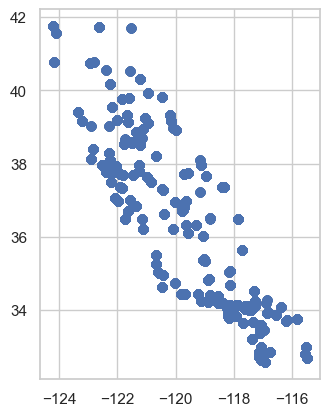

In [36]:
geo_final.plot()

In [37]:
new_g = gpd.read_file("California_County_Boundaries.geojson")

In [38]:
new_g.head()

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682..."
1,2,Alpine,Inland,4,4,06,003,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8..."
2,3,Amador,Inland,4,4,06,005,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5..."
3,4,Butte,Inland,3,3,06,007,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0..."
4,5,Calaveras,Inland,4,4,06,009,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5..."


In [39]:
new_g.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

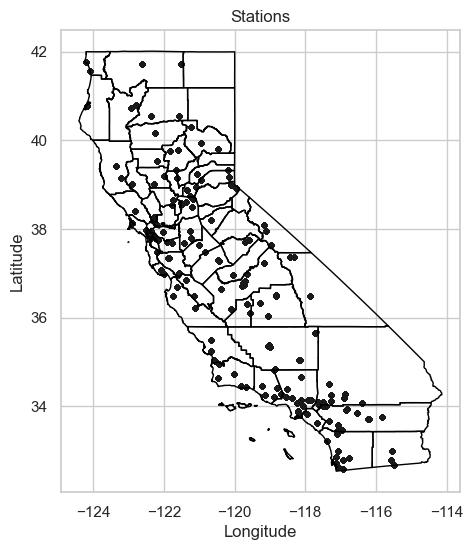

In [40]:
plt.figure(figsize=(10,6))
new_g.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
geo_final.plot(ax=plt.gca(), color='k', markersize=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stations')
plt.show()

In [41]:
xmin, ymin, xmax, ymax = new_g.total_bounds

In [42]:
# Create grid
num_points = 500
grid_lon = np.linspace(xmin, xmax, num_points)
grid_lat = np.linspace(ymin, ymax, num_points)
grid_x, grid_y = np.meshgrid(grid_lon, grid_lat)

grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))

In [107]:
from rasterio.mask import mask
import json
from scipy.spatial import cKDTree
from matplotlib.path import Path
from scipy.interpolate import griddata
from shapely.geometry import MultiPoint, LineString
import matplotlib as mpl
import contextily as ctx

In [44]:
def idw_interpolation(x, y, z, xi, yi, power=2):
    tree = cKDTree(np.c_[x, y])
    dist, idx = tree.query(np.c_[xi, yi], k=len(x))
    
    weights = 1 / (dist ** power)
    weights[dist == 0] = 1e12  # Avoid zero division
    
    z_idw = np.sum(weights * z[idx], axis=1) / np.sum(weights, axis=1)
    return z_idw

In [45]:
geo_final.head()

,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Hour,geometry
0,2020-01-01,48,8.6,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
1,2020-01-02,25,4.5,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
2,2020-01-03,61,14.2,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
3,2020-01-04,54,10.9,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)
4,2020-01-05,43,7.8,6,California,1,Alameda,37.687526,-121.784217,0,POINT (-121.78422 37.68753)


In [46]:
geo_final.nunique()

Date                              366
Daily AQI Value                   104
Daily Mean PM2.5 Concentration    377
State FIPS Code                     1
State                               1
County FIPS Code                   51
County                             51
Site Latitude                     166
Site Longitude                    166
Hour                                1
geometry                          166
dtype: int64

In [47]:
geo_final.shape

(53875, 11)

In [48]:
final = geo_final.dissolve('Site Latitude').reset_index()

In [49]:
final.head()

,Site Latitude,geometry,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Longitude,Hour
0,32.578165,POINT (-116.92137 32.57816),2020-01-01,56,12.0,6,California,73,San Diego,-116.921374,0
1,32.631242,POINT (-117.05909 32.63124),2020-01-01,54,10.9,6,California,73,San Diego,-117.059088,0
2,32.676180,POINT (-115.48307 32.67618),2020-01-01,75,22.2,6,California,25,Imperial,-115.483070,0
3,32.710177,POINT (-117.14266 32.71018),2020-01-01,57,12.3,6,California,73,San Diego,-117.142665,0
4,32.789565,POINT (-116.94431 32.78957),2020-01-01,76,22.7,6,California,73,San Diego,-116.944308,0


In [50]:
x = final['Site Longitude'].values
y = final['Site Latitude'].values
z = final['Daily Mean PM2.5 Concentration'].values

In [91]:
predicted = idw_interpolation(x, y, z, grid_x.ravel(), grid_y.ravel())

In [52]:
# Create GeoDataFrame for predicted raster grid
gdf_predicted = gpd.GeoDataFrame({
    'IDW_PM2.5': predicted,  # length must match flattened grid
    'geometry': [Point(x, y) for x, y in zip(grid_x.ravel(), grid_y.ravel())]
}, crs="EPSG:4326")

In [53]:
gdf_predicted['IDW_PM2.5'].max()

37.334781374753

In [54]:
gdf_predicted_clipped = gpd.clip(gdf_predicted, new_g)

# Save or plot
gdf_predicted_clipped.head()

,IDW_PM2.5,geometry
12283,14.380105,POINT (-118.57956 32.98983)
13282,14.472905,POINT (-118.60015 33.02781)
4351,11.864173,POINT (-117.17901 32.68598)
4852,12.200811,POINT (-117.15842 32.70497)
4850,11.596985,POINT (-117.19961 32.70497)


<Axes: >

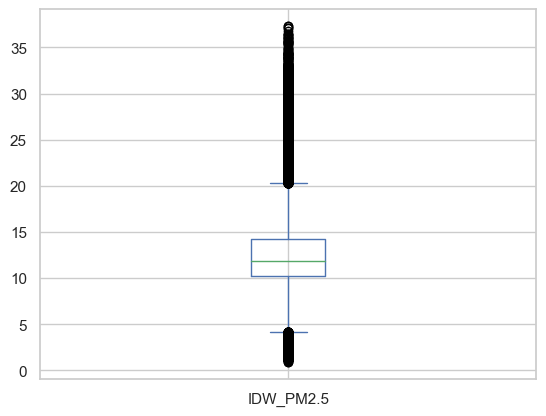

In [55]:
gdf_predicted_clipped['IDW_PM2.5'].plot(kind = 'box')

In [56]:
def remove_outliers_iqr1(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [57]:
#filtered1 = remove_outliers_iqr1(gdf_predicted_clipped, 'IDW_PM2.5')

In [58]:
final_exploded = final.explode(index_parts=False).reset_index(drop=True)

In [59]:
grid_points = np.array([[point.x, point.y] for point in gdf_predicted_clipped.geometry])
grid_values = gdf_predicted_clipped['IDW_PM2.5'].values

# Step 2: Get coordinates from station points
station_coords = np.array([[geom.x, geom.y] for geom in final.geometry])

# Step 3: Interpolate grid values at station locations
idw_at_stations = griddata(
    points=grid_points,
    values=grid_values,
    xi=station_coords,
    method='linear'  # or 'cubic' or 'nearest'
)

# Step 4: Add to your station GeoDataFrame
final['IDW_PM2.5'] = idw_at_stations

In [60]:
final.head()

,Site Latitude,geometry,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Longitude,Hour,IDW_PM2.5
0,32.578165,POINT (-116.92137 32.57816),2020-01-01,56,12.0,6,California,73,San Diego,-116.921374,0,11.998956
1,32.631242,POINT (-117.05909 32.63124),2020-01-01,54,10.9,6,California,73,San Diego,-117.059088,0,10.926087
2,32.676180,POINT (-115.48307 32.67618),2020-01-01,75,22.2,6,California,25,Imperial,-115.483070,0,22.010001
3,32.710177,POINT (-117.14266 32.71018),2020-01-01,57,12.3,6,California,73,San Diego,-117.142665,0,12.239976
4,32.789565,POINT (-116.94431 32.78957),2020-01-01,76,22.7,6,California,73,San Diego,-116.944308,0,22.234266


In [61]:
final.shape

(166, 12)

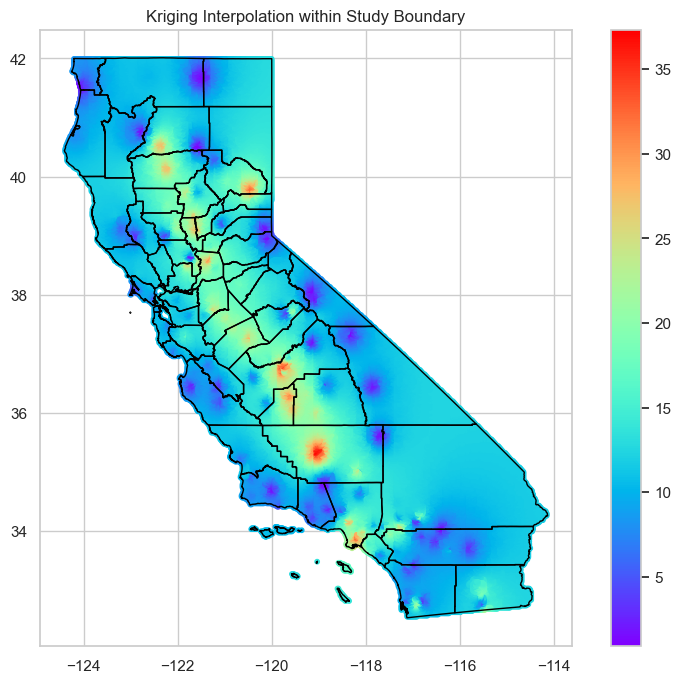

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf_predicted_clipped.plot(column="IDW_PM2.5", ax=ax, cmap="rainbow", markersize=10, legend=True)
new_g.boundary.plot(ax=ax, color='black', linewidth=1)
plt.title("Kriging Interpolation within Study Boundary")
plt.show()

In [63]:
new_g.head()

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682..."
1,2,Alpine,Inland,4,4,06,003,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8..."
2,3,Amador,Inland,4,4,06,005,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5..."
3,4,Butte,Inland,3,3,06,007,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0..."
4,5,Calaveras,Inland,4,4,06,009,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5..."


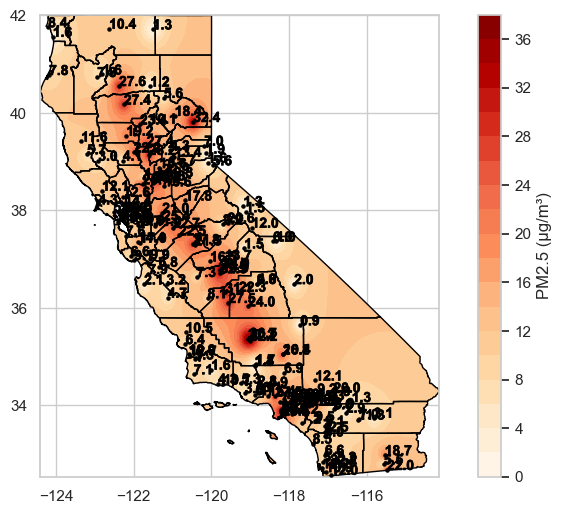

In [93]:
xx = grid_x.ravel()
yy = grid_y.ravel()
zz = predicted.ravel()

# Step 2: Handle polygon(s)
boundary_poly = new_g.unary_union  # Merge all if needed

# Collect paths (for MultiPolygon)
if boundary_poly.geom_type == "Polygon":
    polys = [boundary_poly]
elif boundary_poly.geom_type == "MultiPolygon":
    polys = list(boundary_poly.geoms)
else:
    raise ValueError("Boundary must be Polygon or MultiPolygon")

# Create paths for all polygons
boundary_paths = [Path(np.array(poly.exterior.coords)) for poly in polys]

# Step 3: Mask points (inside ANY polygon)
points = np.vstack((xx, yy)).T
mask = np.zeros(len(points), dtype=bool)
for path in boundary_paths:
    mask |= path.contains_points(points)

zz_masked = np.where(mask, zz, np.nan)

# Step 4: Reshape for contour plotting
zz_masked_reshaped = zz_masked.reshape(grid_x.shape)

# Step 5: Plot contour
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(grid_x, grid_y, zz_masked_reshaped, levels=20, cmap="OrRd")

# Overlay boundary
new_g.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot main PM2.5 stations
final.plot(ax=ax, color='black', edgecolor='black', markersize=5, label='Stations', zorder=10)

# Annotate each station with its value
for idx, row in final.iterrows():
    ax.text(
        row.geometry.x + 0.001, row.geometry.y,
        f"{row['IDW_PM2.5']:.1f}",
        fontsize=10,
        fontweight='bold',
        color='black',
        path_effects=[mpl.patheffects.withStroke(linewidth=0.5, foreground="black")],
        zorder=12
    )

# Add colorbar and labels
plt.colorbar(contour, ax=ax, label='PM2.5 (μg/m³)')

# Limit axes to boundary
minx, miny, maxx, maxy = new_g.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

In [65]:
final.head()

,Site Latitude,geometry,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Longitude,Hour,IDW_PM2.5
0,32.578165,POINT (-116.92137 32.57816),2020-01-01,56,12.0,6,California,73,San Diego,-116.921374,0,11.998956
1,32.631242,POINT (-117.05909 32.63124),2020-01-01,54,10.9,6,California,73,San Diego,-117.059088,0,10.926087
2,32.676180,POINT (-115.48307 32.67618),2020-01-01,75,22.2,6,California,25,Imperial,-115.483070,0,22.010001
3,32.710177,POINT (-117.14266 32.71018),2020-01-01,57,12.3,6,California,73,San Diego,-117.142665,0,12.239976
4,32.789565,POINT (-116.94431 32.78957),2020-01-01,76,22.7,6,California,73,San Diego,-116.944308,0,22.234266


In [66]:
coords = np.array([[point.x, point.y, val] for point, val in zip(final.geometry, final['Daily Mean PM2.5 Concentration'])])

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
def idw_interpolate(xyz, xi, yi, power=2):
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    dist = np.sqrt((x - xi)**2 + (y - yi)**2)
    dist[dist == 0] = 1e-10
    weights = 1 / dist**power
    return np.sum(weights * z) / np.sum(weights)


In [71]:
observed = []
predicted = []

for i in range(len(coords)):
    train = np.delete(coords, i, axis=0)
    test_x, test_y, test_z = coords[i]
    
    pred = idw_interpolate(train, test_x, test_y)
    observed.append(test_z)
    predicted.append(pred)

In [72]:
# Convert to DataFrame
df_eval = pd.DataFrame({'Observed': observed, 'Predicted': predicted})

In [73]:
rmse = np.sqrt(mean_squared_error(df_eval['Observed'], df_eval['Predicted']))
mae = mean_absolute_error(df_eval['Observed'], df_eval['Predicted'])
r2 = r2_score(df_eval['Observed'], df_eval['Predicted'])

In [74]:

print("📊 Model Evaluation Metrics")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R²:   {r2:.3f}")

📊 Model Evaluation Metrics
RMSE: 7.996
MAE:  6.059
R²:   0.315


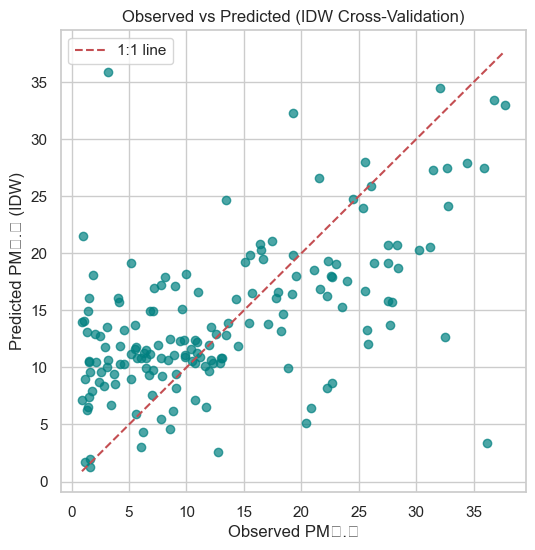

In [75]:
plt.figure(figsize=(6,6))
plt.scatter(df_eval['Observed'], df_eval['Predicted'], color='teal', alpha=0.7)
plt.plot([min(observed), max(observed)], [min(observed), max(observed)], 'r--', label="1:1 line")
plt.xlabel("Observed PM₂.₅")
plt.ylabel("Predicted PM₂.₅ (IDW)")
plt.title("Observed vs Predicted (IDW Cross-Validation)")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
final.head()

,Site Latitude,geometry,Date,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Longitude,Hour,IDW_PM2.5
0,32.578165,POINT (-116.92137 32.57816),2020-01-01,56,12.0,6,California,73,San Diego,-116.921374,0,11.998956
1,32.631242,POINT (-117.05909 32.63124),2020-01-01,54,10.9,6,California,73,San Diego,-117.059088,0,10.926087
2,32.676180,POINT (-115.48307 32.67618),2020-01-01,75,22.2,6,California,25,Imperial,-115.483070,0,22.010001
3,32.710177,POINT (-117.14266 32.71018),2020-01-01,57,12.3,6,California,73,San Diego,-117.142665,0,12.239976
4,32.789565,POINT (-116.94431 32.78957),2020-01-01,76,22.7,6,California,73,San Diego,-116.944308,0,22.234266


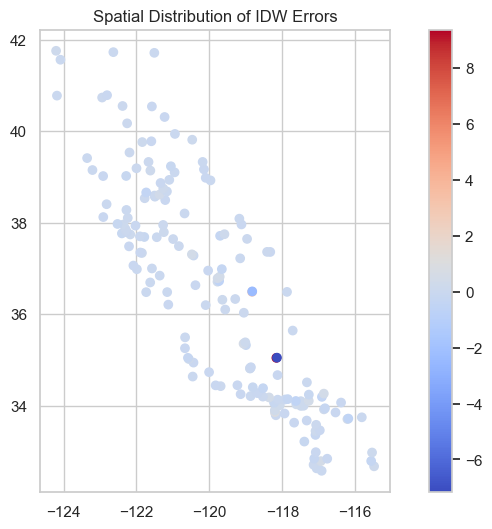

In [77]:
final['Error'] = final['Daily Mean PM2.5 Concentration'] - final['IDW_PM2.5']

final.plot(column='Error', cmap='coolwarm', legend=True, figsize=(10,6))
plt.title('Spatial Distribution of IDW Errors')
plt.show()

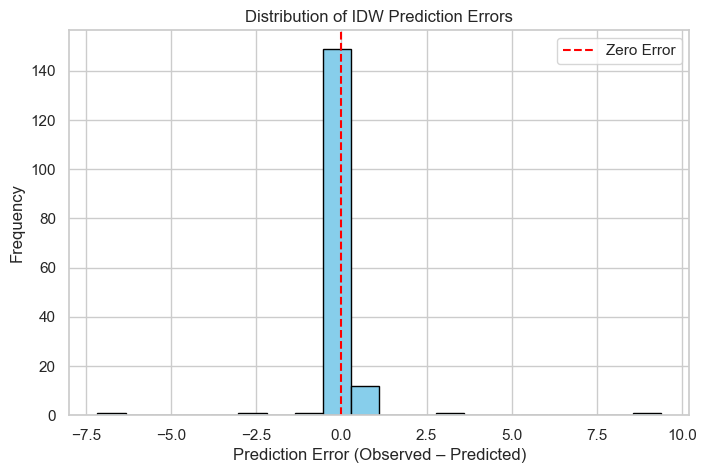

In [78]:
plt.figure(figsize=(8,5))
plt.hist(final['Error'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.title("Distribution of IDW Prediction Errors")
plt.xlabel("Prediction Error (Observed – Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [79]:
mbe = np.mean(final['Error'])
print(f"Mean Bias Error: {mbe:.3f} µg/m³")

Mean Bias Error: 0.019 µg/m³


In [80]:
from scipy.stats import shapiro

stat, p_value = shapiro(final['Error'])
if p_value > 0.05:
    print("Residuals are approximately normally distributed.")
else:
    print("Residuals deviate from normal distribution.")

Residuals deviate from normal distribution.


In [89]:
from esda.moran import Moran
from libpysal.weights import KNN

# Create spatial weights (e.g., 5 nearest neighbors)
w = KNN.from_dataframe(final, k=5)
moran = Moran(final['Error'], w)
print(f"Moran’s I: {moran.I:.3f}, p-value: {moran.p_sim:.3f}")

Moran’s I: -0.191, p-value: 0.002


In [94]:
final.columns

Index(['Site Latitude', 'geometry', 'Date', 'Daily AQI Value',
       'Daily Mean PM2.5 Concentration', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Longitude', 'Hour', 'IDW_PM2.5',
       'Error'],
      dtype='object')

<Axes: xlabel='County'>

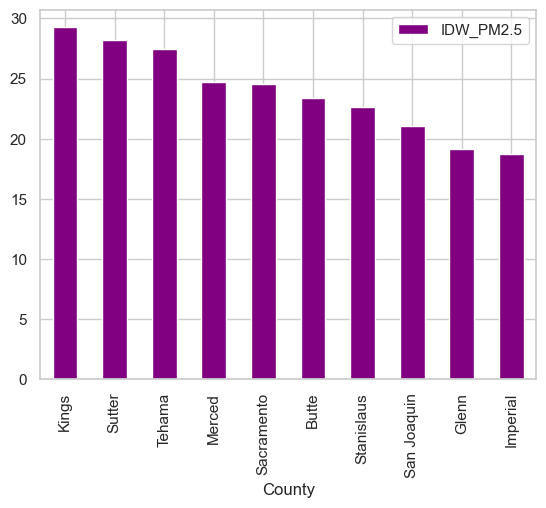

In [99]:
final[['IDW_PM2.5', 'County']].groupby(['County'])\
.median().sort_values("IDW_PM2.5", ascending = False).head(10)\
.plot.bar(color='Purple')

In [100]:
new_g.head()

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682..."
1,2,Alpine,Inland,4,4,06,003,3.145871e+09,274621.121060,"POLYGON ((-119.93433 38.80882, -119.93426 38.8..."
2,3,Amador,Inland,4,4,06,005,2.559998e+09,357482.565247,"POLYGON ((-120.25766 38.58033, -120.25735 38.5..."
3,4,Butte,Inland,3,3,06,007,7.338660e+09,526729.272631,"POLYGON ((-121.63427 40.00127, -121.63428 40.0..."
4,5,Calaveras,Inland,4,4,06,009,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.20961 38.5..."


In [ ]:
merge12 = pd.merge(df13, merge11, on='fips', how='left')

best_data = pd.merge(geo1, merge12, on='fips', how='left')

In [103]:
new_final = gpd.sjoin_nearest(new_g, final, how = 'left',distance_col='dist' )

In [104]:
new_final.head()

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry,...,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,County,Site Longitude,Hour,IDW_PM2.5,Error,dist
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",...,8.6,6,California,1,Alameda,-121.784217,0,8.725654,-0.125654,0.0
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",...,10.9,6,California,1,Alameda,-121.903019,0,10.910790,-0.010790,0.0
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",...,13.1,6,California,1,Alameda,-122.169935,0,12.980963,0.119037,0.0
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",...,9.9,6,California,1,Alameda,-122.263376,0,9.961880,-0.061880,0.0
0,1,Alameda,Coastal,2,2,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2682...",...,10.7,6,California,1,Alameda,-122.282347,0,10.643085,0.056915,0.0


In [105]:
final1 = new_final.dissolve('County').reset_index()

In [106]:
final1.head()

,County,geometry,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,...,Daily AQI Value,Daily Mean PM2.5 Concentration,State FIPS Code,State,County FIPS Code,Site Longitude,Hour,IDW_PM2.5,Error,dist
0,Alameda,"MULTIPOLYGON (((-122.26602 37.90509, -122.2655...",1,Alameda,Coastal,2,2,06,001,3.082165e+09,...,48,8.6,6,California,1,-121.784217,0,8.725654,-0.125654,0.000000
1,Butte,"POLYGON ((-121.63428 40.00239, -121.63429 40.0...",4,Butte,Inland,3,3,06,007,7.338660e+09,...,85,27.5,6,California,7,-121.668811,0,27.442302,0.057698,0.000000
2,Calaveras,"POLYGON ((-120.07145 38.50223, -120.07145 38.5...",3,Amador,Inland,4,4,06,005,2.559998e+09,...,67,17.8,6,California,9,-120.680277,0,17.791041,0.008959,0.113448
3,Colusa,"POLYGON ((-122.73794 39.38375, -122.73740 39.3...",6,Colusa,Inland,3,3,06,011,4.989966e+09,...,22,4.0,6,California,11,-122.281803,0,4.124423,-0.124423,0.000000
4,Contra Costa,"MULTIPOLYGON (((-121.58857 38.09421, -121.5859...",7,Contra Costa,Coastal,2,2,06,013,3.094109e+09,...,52,9.8,6,California,13,-122.026154,0,9.878500,-0.078500,0.000000


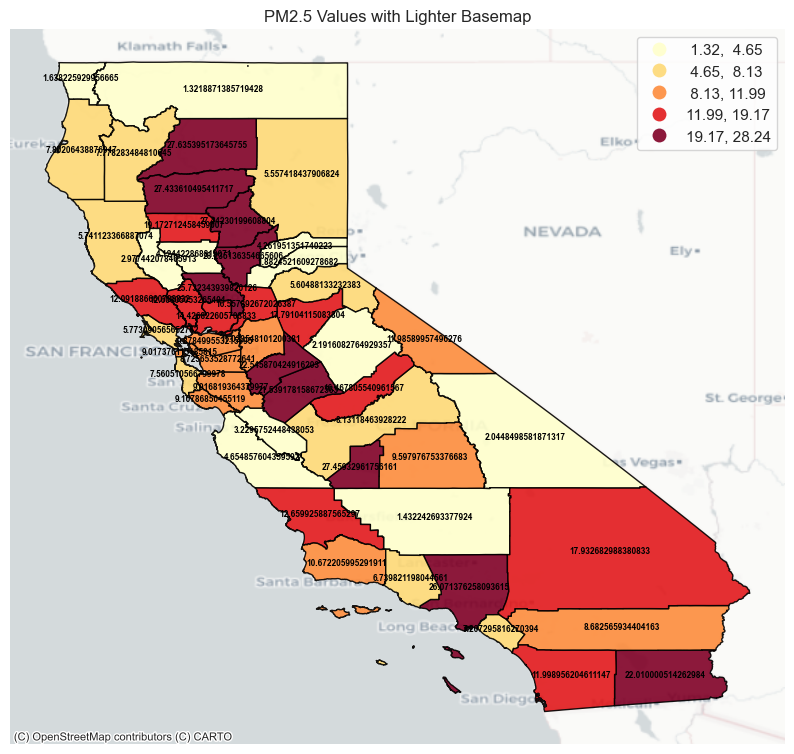

In [109]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygons with PM2.5 values
# Using a colormap to represent PM2.5 values
# Plot the polygons with PM2.5 values classified into quartiles
final1.plot(
    column='IDW_PM2.5', 
    ax=ax, 
    edgecolor='black', 
    cmap='YlOrRd', 
    scheme='quantiles',  # Quartile classification
    legend=True, 
    alpha=0.9,
    classification_kwds={'k': 5}  )# 4 quantiles (quartiles)
# Add basemap with transparency
ctx.add_basemap(ax, crs=final1.crs.to_string(), source=ctx.providers.CartoDB.Positron)
# Add the value of PM2.5 as text on the map
for idx, row in final1.iterrows():
    # Get the centroid of each polygon
    centroid = row['geometry'].centroid
    # Add text label for PM2.5 values
    ax.text(centroid.x, centroid.y, str(row['IDW_PM2.5']), fontsize=6, ha='center', color='black', weight='bold')


# Set labels and title
ax.set_title('PM2.5 Values with Lighter Basemap')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Remove axis for better visual
ax.set_axis_off()

plt.show()